In [1]:
import scipy.stats as stats

# Question 2C

In [138]:
mu1, sigma1 = 0,1
mu2, sigma2 = (2/3 * 3.14159), np.sqrt(0.5)

In [139]:
H = [i / 400 for i in range (1201)]

In [140]:
def true_error(h):
    error_class_neg1 = 1 - stats.norm.cdf(h, loc=mu1, scale=sigma1)
    error_class_pos1 = stats.norm.cdf(h, loc=mu2, scale=sigma2)
    return 0.5 * (error_class_pos1 + error_class_neg1)


errors = [true_error(h) for h in H]
best_index = errors.index(min(errors))
h_star = H[best_index]
print(f" h* = {h_star} and the corresponding index is {best_index}")

 h* = 1.1125 and the corresponding index is 445


# Question 2E

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [142]:
mu1, std1, size1 = 0, 1, 100
mu2, std2, size2 = 2/3 * 3.14159, np.sqrt(0.5), 100

In [143]:
samples_neg1 = np.random.normal(mu1, std1, size1)
samples_pos1 = np.random.normal(mu2, std2, size2)

In [144]:
labels_neg1 = np.full(size1, -1)
labels_pos1 = np.full(size2, 1)

In [145]:
samples = np.concatenate((samples_neg1, samples_pos1))
labels = np.concatenate((labels_neg1, labels_pos1))

In [146]:
H = [i/400 for i in range(1201)]
best_h = None
min_error = float('inf')

In [147]:
for b in H:

    predictions = np.where(samples > b, 1, -1)

    empirical_error = np.mean(predictions!=labels)

    if empirical_error < min_error:
        min_error = empirical_error
        best_h = b

In [148]:
best_h

0.93

# Question 3

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data.tsv', delimiter='\t', header=None)

In [3]:
df.head()

,0,1,2
0,0.00,0.63,1
1,0.08,0.50,1
2,0.25,0.36,1
3,0.28,0.12,1
4,0.11,0.22,1


In [18]:
def perceptron(data, labels):
    m, n = data.shape
    weights = np.zeros(n)
    bias = 0
    is_classified = False
    
    while not is_classified:
        is_classified=True
        for i in range(m):
            if labels[i] * (np.dot(weights, data[i]) + bias) <= 0:
                weights += labels[i] * data[i]
                bias += labels[i]
                is_classified=False
    return weights, bias

In [19]:
data = df[[0, 1]].values
labels = df[2].values

print("Data shape:", data.shape)
print("Labels shape:", labels.shape)
print("Data preview:", data[:5])
print("Labels preview:", labels[:5])

Data shape: (18, 2)
Labels shape: (18,)
Data preview: [[0.   0.63]
 [0.08 0.5 ]
 [0.25 0.36]
 [0.28 0.12]
 [0.11 0.22]]
Labels preview: [1 1 1 1 1]


In [22]:
weights, bias = perceptron(data, labels) 

In [23]:
weights

array([-3.52, -1.24])

In [24]:
bias

np.int64(2)

In [25]:
def plot_decision_boundary(weights, bias, data, labels):
    # Create a grid of points
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Predict class labels for each point in the grid
    Z = np.dot(np.c_[xx.ravel(), yy.ravel()], weights) + bias
    Z = (Z > 0).astype(int)  # Convert to binary labels (0 or 1)
    Z = Z.reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(data[:, 0], data[:, 1], c=labels, edgecolors='k', cmap='coolwarm')
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()

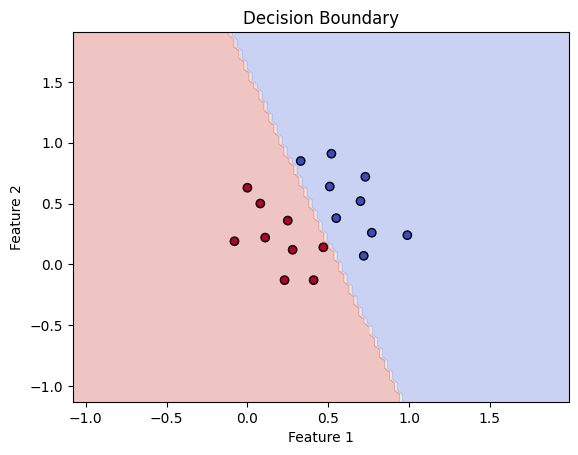

In [26]:
plot_decision_boundary(weights, bias, data, labels)